# 4.2 单量子比特运算

未完成的证明：练习 4.11

In [54]:
import numpy as np
import scipy
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_bloch_multivector

## 练习 4.1

:::{admonition} 练习 4.1

练习 2.11 计算了 Pauli 矩阵的特征向量 (如果还没有做这个练习，请现在就做)，在 Bloch 球面上求出不同 Pauli 矩阵的归一化特征向量对应的点。

:::

首先，这三个 Pauli 矩阵 $X, Y, Z$ 的特征值均为 $\lambda_1 = -1, \lambda_2 = 1$。它们的特征向量分别是

$$
\begin{alignat*}{4}
|x_1\rangle &= - \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle,& \quad |x_2\rangle &= \frac{1}{\sqrt{2}} |0\rangle + \frac{1}{\sqrt{2}} |1\rangle \\
|y_1\rangle &= - \frac{1}{\sqrt{2}} |0\rangle + \frac{i}{\sqrt{2}} |1\rangle,& \quad |y_2\rangle &= \frac{1}{\sqrt{2}} |0\rangle + \frac{i}{\sqrt{2}} |1\rangle \\
|z_1\rangle &= |1\rangle,& \quad |z_2\rangle &= |0\rangle
\end{alignat*}
$$

下面使用程序绘制 Bloch 球面。我们先用 NumPy 给出本征向量，随后代入到 Qiskit 中绘制。可以看到，$X, Y, Z$ 的本征值分别对应 Bloch 球面上 $x, y, z$ 三个方向。

In [2]:
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

In [3]:
def ex_4_1(matrix, title=None):
    """ Input Pauli matrix X or Y or Z; Draw eigenvectors of matrix on Bloch sphere. """
    eig = np.linalg.eigh(matrix)[1].T
    circ = QuantumCircuit(2)
    for n, e in enumerate(eig):
        circ.initialize(e, n)
    return plot_bloch_multivector(circ, title)

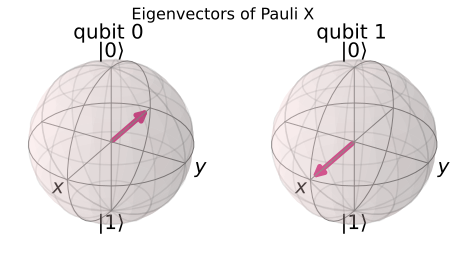

In [4]:
ex_4_1(X, "Eigenvectors of Pauli X")

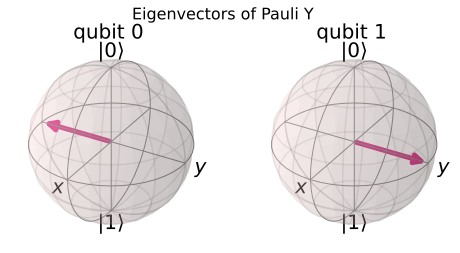

In [5]:
ex_4_1(Y, "Eigenvectors of Pauli Y")

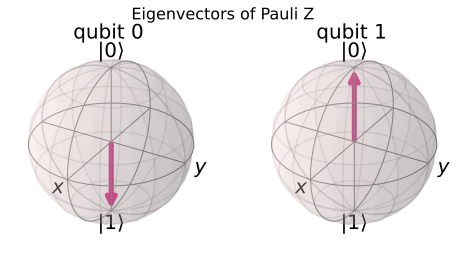

In [6]:
ex_4_1(Z, "Eigenvectors of Pauli Z")

## 练习 4.2

:::{admonition} 练习 4.2

令 $x \in \mathbb{R}$ 即为实数，$A$ 为一矩阵且满足 $A^2 = I$。证明：

$$
\exp (i A x) = \cos (x) I + i \sin (x) A
$$

利用这一结果验证式 (4.4) 到式 (4.6) 即关于 $\hat x, \hat y, \hat z$ 轴向的旋转算符定义：

$$
\begin{align*}
R_x (\theta) &\equiv e^{i \theta X / 2} = \cos \frac{\theta}{2} I - i \sin \frac{\theta}{2} X = \begin{bmatrix} \cos \frac{\theta}{2} & - i \sin \frac{\theta}{2} \\ -i \sin \frac{\theta}{2} & \cos \frac{\theta}{2} \end{bmatrix} \tag{4.4} \\
R_y (\theta) &\equiv e^{i \theta Y / 2} = \cos \frac{\theta}{2} I - i \sin \frac{\theta}{2} Y = \begin{bmatrix} \cos \frac{\theta}{2} & - \sin \frac{\theta}{2} \\ \sin \frac{\theta}{2} & \cos \frac{\theta}{2} \end{bmatrix} \tag{4.5} \\
R_z (\theta) &\equiv e^{i \theta Z / 2} = \cos \frac{\theta}{2} I - i \sin \frac{\theta}{2} Z = \begin{bmatrix} e^{- i \theta / 2} & 0 \\ 0 & e^{i \theta / 2} \end{bmatrix} \tag{4.6}
\end{align*}
$$

:::

首先，我们回顾一下 $z \in C$ 下的 Taylor 展开：

$$
\begin{align*}
\exp(z) &= \sum_{k=0}^n \frac{z^k}{k!} = 1 + z + \frac{z^2}{2!} + \frac{z^3}{3!} + \frac{z^4}{4!} + \frac{z^5}{5!} + \cdots \\
\cos(z) &= \sum_{\substack{k=0 \\ 2 \mid k}}^n (-1)^{k/2} \frac{z^k}{k!} = 1 - \frac{z^2}{2!} + \frac{z^4}{4!} + \cdots \\
\sin(z) &= \sum_{\substack{k=1 \\ 2 \nmid k}}^n (-1)^{(k-1)/2} \frac{z^k}{k!} = z - \frac{z^3}{3!} + \frac{z^5}{5!} + \cdots
\end{align*}
$$

对于矩阵而言，其 Taylor 展开是类似的。我们将 $z = i A x$ 代入，并以尽可能消除虚数符号为目的，得到

$$
\exp(i A x) = \sum_{k=0}^n i^k \frac{(Ax)^k}{k!} = \sum_{\substack{k=0 \\ 2 \mid k}}^n (-1)^{k/2} \frac{(Ax)^k} {k!} + i \sum_{\substack{k=1 \\ 2 \nmid k}}^n (-1)^{(k-1)/2} \frac{(Ax)^k} {k!} = \cos (A x) + i \sin (A x)
$$

如果不用级数展开，而使用 Euler 公式 $e^{i x} = \cos(x) + i \sin (x)$，也可以得到相同的结论。

随后，我们注意到另一个条件 $A^2 = I$，那么上式可以进一步化简。我们先讨论 $\cos$ 的情况：

$$
\cos (A x) = \sum_{\substack{k=0 \\ 2 \mid k}}^n (-1)^{k/2} \frac{x^k A^k} {k!} = \sum_{\substack{k=0 \\ 2 \mid k}}^n (-1)^{k/2} \frac{x^k (A^2)^{k/2}} {k!} = \sum_{\substack{k=0 \\ 2 \mid k}}^n (-1)^{k/2} \frac{x^k I} {k!} = I \sum_{\substack{k=0 \\ 2 \mid k}}^n (-1)^{k/2} \frac{x^k} {k!} = \cos(x) I
$$

这里利用到求和角标 $k$ 必须是偶数的条件，因此可以将 $A^k$ 的偶数幂次化为单位阵的幂次 $I^{k/2}$，进而所有被求和项只包含矩阵 $I$，可以提到求和之外。最终，将矩阵的函数化为数值函数与矩阵的乘积。

对于 $\sin$ 而言，情况是类似的：

$$
\sin(A x) = \sum_{\substack{k=1 \\ 2 \nmid k}}^n (-1)^{(k-1)/2} \frac{x^k A^k} {k!} = \sum_{\substack{k=1 \\ 2 \nmid k}}^n (-1)^{(k-1)/2} \frac{x^k (A^2)^{(k-1)/2} A} {k!} = A \sum_{\substack{k=1 \\ 2 \nmid k}}^n (-1)^{(k-1)/2} \frac{x^k} {k!} = \sin(x) A
$$

将 $\cos(Ax) = \cos(x) I$ 与 $\sin(Ax) = \sin(x) A$ 代入 $\exp(i A x)$ 的展开式，得证。

我们不再验证式 (4.4-6)，只是使用程序简单验证一下当 $\theta = 0.3$ 时式 4.4 的正确性。下面的第一个代码块是计算 $\theta = 0.3$ 时 $e^{i \theta X / 2}$ 的结果；第二个代码块则是式 (4.4) 最右边的矩阵数值结果。

In [9]:
θ = 0.3
scipy.linalg.expm(1j * θ * X / 2)

array([[0.98877108+0.j        , 0.        +0.14943813j],
       [0.        +0.14943813j, 0.98877108+0.j        ]])

In [10]:
np.array([
    [np.cos(θ/2), - 1j * np.sin(θ/2)],
    [- 1j * np.sin(θ/2), np.cos(θ/2)]
])

array([[0.98877108+0.j        , 0.        -0.14943813j],
       [0.        -0.14943813j, 0.98877108+0.j        ]])

## 练习 4.3

:::{admonition} 练习 4.3

证明除了一个全局相位，$\pi/8$ 门满足 $T = R_z (\pi/4)$。

:::

这直接可以参考书中式 (4.3)：

\begin{equation*}
T = \exp(i \pi/8) \begin{bmatrix} \exp(- i \pi/8) & 0 \\ 0 & \exp(i \pi/8) \end{bmatrix} \tag{4.3}
\end{equation*}

## 练习 4.4

:::{admonition} 练习 4.4

对某个 $\varphi$，将 Hadamard 门表示为旋转算符 $R_x, R_z$ 以及 $e^{i \varphi}$ 的乘积。

:::

这个结果需要稍微凑一下。答案应该是

$$
H = e^{i \varphi} R_z (\varphi) R_x (\varphi) R_z (\varphi)
$$

上式的 $\varphi$ 不是任意的，而是 $\varphi = \pi / 2$。

这个等式意味着，态向量在 Hadamard 门作用下，相当于其在 Bloch 球面的表示先依 $z$ 轴旋转 90°，再依 $x$ 轴旋转 90°、最后依 $z$ 轴旋转 90°。$z$ 轴的方向是 $|1\rangle$ 到 $|0\rangle$；所有旋转都是逆时针旋转。下面的第一块代码是定义 $\varphi = \pi/2$ 以及旋转算符的矩阵表示；第二个代码块是分别给出在 $|\psi\rangle = 0.8 |0\rangle + 0.6i |1\rangle$ 时，$|\psi\rangle$、$R_z (\varphi) |\psi\rangle$、$R_x (\varphi) R_z (\varphi) |\psi\rangle$、$R_z (\varphi) R_x (\varphi) R_z (\varphi) |\psi\rangle$ 的 Bloch 球面表示。籍此可以了解向量是如何沿轴旋转的。

In [94]:
φ = np.pi / 2
Rx_varphi = scipy.linalg.expm(1j * φ * X / 2)
Rz_varphi = scipy.linalg.expm(1j * φ * Z / 2)

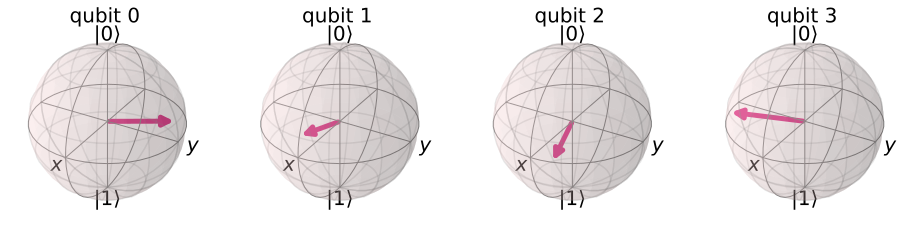

In [95]:
circ = QuantumCircuit(4)
vec = np.array([0.8, 0.6j])
circ.initialize(vec, 0)
circ.initialize(Rz_varphi @ vec, 1)
circ.initialize(Rx_varphi @ Rz_varphi @ vec, 2)
circ.initialize(Rz_varphi @ Rx_varphi @ Rz_varphi @ vec, 3)
plot_bloch_multivector(circ)

## 练习 4.5

:::{admonition} 练习 4.5

证明 $(\hat n \cdot \vec\sigma)^2 = I$，并以此验证式 (4.8)：

$$
R_{\hat n} (\theta) \equiv \exp (- i \theta \hat n \cdot \vec \sigma / 2) = \cos \left( \frac{\theta}{2} \right) I - i \sin \left( \frac{\theta}{2} \right) (n_x X + n_y Y + n_z Z)
\tag{4.8}
$$

其中，$\hat n = (n_x, n_y, n_z)$ 为三维空间的实单位向量，$\vec \sigma = (X, Y, Z)$ 是 Pauli 矩阵的三元向量。

:::

若 $(\hat n \cdot \vec\sigma)^2 = I$ 成立，那么式 (4.8) 的验证实际上和练习 4.2 对式 (4.4-6) 的验证过程实际上是相同的。那么证明的难点还是在 $(\hat n \cdot \vec\sigma)^2 = I$ 的证明上。

实际上证明很简单。首先，容易给出

$$
\hat n \cdot \vec\sigma = n_x X + n_y Y + n_z Z
$$

随后是要作上式的平方。矩阵的平方与数乘不太相同，特别是在对交叉项的处理上。例如 $(A + B)^2 = A^2 + B^2 + AB + BA$。因此，上式平方是

$$
(\hat n \cdot \vec\sigma)^2 = n_x^2 X^2 + n_y^2 Y^2 + n_z^2 Z^2 + n_x n_y (XY+YX) + n_y n_z (YZ+ZY) + n_z n_x (ZX+XZ)
$$

容易验证 $XY+YX = YZ+ZY = ZX+XZ = 0$，因此上式后三项为零矩阵。同时由于 $X^2 = Y^2 = Z^2 = I$，因此前三项恰为

$$
(\hat n \cdot \vec\sigma)^2 = n_x^2 + n_y^2 + n_z^2 = \Vert \hat n \Vert^2 = 1
$$

注意最后我们利用了 $\hat n$ 是单位向量的条件。

## 练习 4.6 (旋转 Bloch 球面的解释)

:::{admonition} 练习 4.6

$R_{\hat n} (\theta)$ 算符称为旋转算符的一个原因是如下要证明的事实。假设一个单量子比特的状态由 Bloch 向量 $\vec \lambda$ 表示，则旋转算符 $R_{\hat n} (\theta)$ 在该态向量上的作用，是绕 Bloch 球面的向量 $\hat n$ 轴旋转 $\theta$ 角度。这个事实解释了旋转矩阵中出现的看起来特别神秘的因子 2。

:::

这里需要先引入一个结论；该结论似乎并未在书中出现。这里请参考下述文档的第 20 页。

> http://www.vcpc.univie.ac.at/~ian/hotlist/qc/talks/bloch-sphere-rotations.pdf

若 $\hat n$ 在 Bloch 球面上的坐标可以用 $(\theta_{\hat n}, \varphi_{\hat n})$ 表示，那么绕 $\hat n$ (逆时针) 旋转 $\theta$ 角度的算符可以表示为

$$
R_{\hat n} (\theta) = R_z (\varphi_{\hat n}) R_y (\theta_{\hat n}) R_z (\theta) R_y (- \theta_{\hat n}) R_z (- \varphi_{\hat n})
$$

其大致思路是将绕 $\hat n$ 轴旋转的问题化为绕 $\hat z$ 轴旋转。具体来说，

1. 执行 $R_z (- \varphi_{\hat n})$，它可以将 $\hat n$ 轴转到 $\varphi = 0$ 处，即转到 $xOz$ 平面上；$\vec \lambda$ 也作了响应的转动；
2. 执行 $R_y (- \theta_{\hat n})$，它可以将方才转到 $xOz$ 平面上的 $\hat n$ 轴再转到 $\theta = 0$ 处，即转到 $z$ 轴上；$\vec \lambda$ 也作了响应的转动；
3. 执行 $R_z (\theta)$，它执行的是经过上述两个步骤转动后，$\vec \lambda$ 相对于处在 $\hat z$ 轴的 $\hat n$ 的旋转 $\theta$ 角度操作；
4. 执行 $R_z (\varphi_{\hat n}) R_y (- \theta_{\hat n})$，复原 $\hat n$ 的位置；$\vec \lambda$ 也作了响应的转动。

从物理的直觉上，如果我们接受 $R_y(\theta), R_z(\theta)$ 算符的物理意义，那么这五步操作确实可以表示绕 Bloch 球面的向量 $\hat n$ 轴旋转 $\theta$ 角度。

但我们并未证明数学上等式左右是成立的。证明的过程会是非常繁琐的；我们用 Mathematica 对计算过程简化，可以验证

$$
\begin{align*}
&\quad R_z (\varphi_{\hat n}) R_y (\theta_{\hat n}) R_z (\theta) R_y (- \theta_{\hat n}) R_z (- \varphi_{\hat n}) \\
&= \begin{bmatrix}
\displaystyle
\cos \frac{\theta}{2} - i \cos \theta_{\hat n} \sin \frac{\theta}{2} &
\displaystyle
\sin \frac{\theta}{2} \sin \theta_{\hat n} \big( - i \cos \varphi_{\hat n} - \sin \varphi_{\hat n} \big)
\\
\displaystyle
\sin \frac{\theta}{2} \sin \theta_{\hat n} \big( - i \cos \varphi_{\hat n} + \sin \varphi_{\hat n} \big)
&
\displaystyle
\cos \frac{\theta}{2} + i \cos \theta_{\hat n} \sin \frac{\theta}{2}
\end{bmatrix} \\
&= \cos \frac{\theta}{2} I - i \sin \frac{\theta}{2} \left( \cos \varphi_{\hat n} \sin \theta_{\hat n} \cdot X + \sin \varphi_{\hat n} \sin \theta_{\hat n} \cdot Y + \cos \theta_{\hat n} \cdot Z \right) \\
&= \cos \frac{\theta}{2} I - i \sin \frac{\theta}{2} \hat n \cdot \vec \sigma = R_{\hat n} (\theta)
\end{align*}
$$

就此完成对 $R_{\hat n} (\theta)$ 表达式正确性与物理图景的说明了。

## 练习 4.7

:::{admonition} 练习 4.7

证明 $X Y X = -Y$，并以此证明 $X R_y (\theta) X = R_y (-\theta)$。

:::

$XYX = -Y$ 的证明只需要验证矩阵乘法即可。$X R_y (\theta) X = R_y (-\theta)$ 的证明可以利用式 (4.5) 的结论以及 $X^2 = I$ 的性质：

$$
\begin{align*}
X R_y (\theta) X &= X \left( \cos \frac{\theta}{2} I - i \sin \frac{\theta}{2} Y \right) X \\
&= \cos \frac{\theta}{2} I - i \sin \frac{\theta}{2} XYX = \cos \frac{\theta}{2} I + i \sin \frac{\theta}{2} Y \\
&= \cos \frac{-\theta}{2} I - i \sin \frac{-\theta}{2} Y = R_y (-\theta)
\end{align*}
$$

## 练习 4.8

:::{admonition} 练习 4.8

任意一个单量子比特酉算符可以以下述形式表示：

$$
U = \exp(i \alpha) R_{\hat n} (\theta)
$$

其中 $\alpha, \theta \in \mathbb{R}$、$\hat n$ 为三维实向量。

1. 证明这个事实；
2. 求 $\alpha, \theta, \hat n$ 以得到 Hadamard 门 $H$；
3. 求 $\alpha, \theta, \hat n$ 以得到相位门 $S$。

    $$
    H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}, \quad S = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix}
    $$

:::

**第一问**

首先我们需要表明 $R_{\hat n} (\theta)$ 确实是酉的。实际上之前的练习或书中的文本都没有对这个事实作说明 (练习 4.6 或许需要)。我们首先回顾式 (4.8)：

$$
R_{\hat n} (\theta) = \cos \left( \frac{\theta}{2} \right) I - i \sin \left( \frac{\theta}{2} \right) (\hat n \cdot \vec \sigma)
$$

这里我们用了练习 4.5 的记号。对 $R_{\hat n} (\theta)$ 取共轭转置，可知

$$
R_{\hat n}^\dagger (\theta) = \cos \left( \frac{\theta}{2} \right) I + i \sin \left( \frac{\theta}{2} \right) (\hat n \cdot \vec \sigma)
$$

这里利用了 Pauli 矩阵的共轭转置仍然是自身的性质；因此，只有一个虚数单位的 $i$ 的正负号被颠倒了而已。两者相乘，可以得到

$$
\begin{align*}
R_{\hat n} (\theta) R_{\hat n}^\dagger (\theta) &= \cos^2 \left( \frac{\theta}{2} \right) I + \sin^2 \left( \frac{\theta}{2} \right) (\hat n \cdot \vec \sigma)^2 \\
&= \cos^2 \left( \frac{\theta}{2} \right) I + \sin^2 \left( \frac{\theta}{2} \right) I = I
\end{align*}
$$

------

既然 $R_{\hat n} (\theta)$ 是酉的，那么构成该矩阵表示的两个列向量必然是相互正交且归一的。我们假设一个酉矩阵可以写为

$$
U = \begin{bmatrix} a & b \\ c & d \end{bmatrix}
$$

- 若 $a, b, c$ 的值是确定的，那么 $d$ 的值也必然是确定的，因为 $U U^\dagger = I$ 可以推演出 $a c^* + b d^* = 0$。
- 分别依据 $U U^\dagger = I$ 与 $U^\dagger U = I$，我们可以知道 $|a|^2 + |b|^2 = 1$ 与 $|a|^2 + |c|^2 = 1$。这也同时意味着 $|b| = |c|$。因此 $b, c$ 的值不是任意的。

以上述两个结论出发，可以知道若要使一个 $\mathbb{C}^2$ 的酉矩阵可以表示为任意酉矩阵，
- $a$ 可以是任意 $0 \leqslant |a| \leqslant 1$ 的复数；
- $b, c$ 在给定 $a$ 的值时，尽管模长是固定的，但分别可以取任意相位。

现在回到 $R_{\hat n} (\theta)$ 的讨论上。我们将其矩阵形式写出：

$$
R_{\hat n} (\theta) = \begin{bmatrix} a & b \\ c & d \end{bmatrix} = e^{i \alpha } \begin{bmatrix}
\cos \frac{\theta}{2} - i n_z \sin \frac{\theta}{2} & (- i n_x - n_y) \sin \frac{\theta}{2} \\
(- i n_x + n_y) \sin \frac{\theta}{2} & \cos \frac{\theta}{2} + i n_z \sin \frac{\theta}{2}
\end{bmatrix}
$$

------

首先，我们考察 $b = e^{i \alpha} (- i n_x - n_y) \sin (\theta/2)$ 与 $c = e^{i \alpha} (- i n_x + n_y) \sin (\theta/2)$ 的相位可以是任意的。我们可以计算得到 (下式利用到 $\theta \in [0, 2 \pi)$ 下，$\sin (\theta/2) \geqslant 0$，因此 $n_y \sin (\theta/2) < 0$ 在 $\sin(\theta/2) \neq 0$ 时等价于 $n_y < 0$)

$$
\begin{align*}
\arg (b) &= \alpha + \arctan \frac{n_x}{n_y} + \big( \pi \text{ if } n_y < 0 \text{ else } 0) \mod 2\pi \\
\arg (c) &= \alpha - \arctan \frac{n_x}{n_y} + \big( \pi \text{ if } n_y > 0 \text{ else } 0) \mod 2\pi
\end{align*}
$$

由于上式中有两个自由度 ($\alpha, n_x/n_y$)，因此可以保证 $b, c$ 分别都可以取到任意的相位。

随后，我们再考虑 $a = \cos \frac{\theta}{2} - i n_z \sin \frac{\theta}{2}$ 的取值。我们在讨论 $b, c$ 时，已经使用了 $\alpha$ 的自由度，因此这里 $\alpha$ 应当视作定值。而 $n_x, n_y, n_z$ 三个变量受到归一化条件 $|n_x|^2 + |n_y|^2 + |n_z|^2 = 1$ 限制，因此总自由度为 2；由于 $n_x/n_y$ 的自由度被使用，因此还剩下的自由度可以归到 $n_z$ 的取值上。因此，上面 $a$ 的取值总共受到两个自由度制约，分别是 $\theta$ 的取值与 $n_z$ 的取值。这两个自由度分别对应到 $a$ 的实部与虚部，因此 $a$ 也是可以任意取到的。

------

但稍微严格一些的分析方法是考察 $a = \cos \frac{\theta}{2} - i n_z \sin \frac{\theta}{2}$ 的幅角与模长，因为实部与虚部并不是任意的 $[0, 1]$ 实数，而必须要满足模长不大于 1 的条件。若模长能取任意的 $|a| \in [0, 1]$ 且幅角能取任意的 $\arg (a) \in [0, 2\pi)$，那么 $a$ 便可以取任意 $0 \leqslant |a| \leqslant 1$ 复数；但这种分析稍微有些复杂 (我们仍然用到 $\theta \in [0, 2 \pi)$ 下，$\sin (\theta/2) \geqslant 0$)：

$$
\begin{align*}
|a|^2 &= 1 - (1-n_z^2) \sin^2 \frac{\theta}{2} \in [0, 1] \\
\arg(a) &= \alpha - \arctan \left( n_z \tan \frac{\theta}{2} \right) + \big( \pi \text{ if } n_z < 0 \text{ else } 0 \big) \mod 2 \pi
\end{align*}
$$

现在的自由变量仍然是 $n_z$ 与 $\theta$。但由于幅角需要取模 $2 \pi$ 取余数，还要判断 $\cos (\theta / 2)$ 的正负号，但这不太利于分析。实际上，在确定 $b, c$ 相位时，$\alpha$ 已经被指定了数值了；$\cos (\theta / 2)$ 的正负号可以依靠 $\theta$ 的取值解决。因此，我们会希望下述的 $\gamma_\mathrm{norm}, \gamma_\mathrm{arg}$ 可以取到任意定义域内的值：

$$
\begin{align*}
\gamma_\mathrm{arg} &\equiv \tan \big( \alpha - \arg(a) \big) = n_z \tan \frac{\theta}{2} \in (-\infty, +\infty) \\
\gamma_\mathrm{norm} &\equiv 1 - (1-n_z^2) \sin^2 \frac{\theta}{2} \in (0, 1)
\end{align*}
$$

我们暂且不对 $\gamma_\mathrm{arg} = \pm \infty$ 或 $\gamma_\mathrm{norm} = 0 \text{ or } 1$ 的特殊情况作细致的讨论，只要基本正确就行了。依据上两式，可以推知：

$$
\begin{align*}
\theta = 2 \arccos \left( \pm \sqrt{\frac{\gamma_\mathrm{norm}}{1 + \gamma_{\mathrm{arg}^2}}} \right), \quad n_z = \pm \sqrt{\frac{\gamma_\mathrm{norm} \gamma_\mathrm{arg}^2}{1 - \gamma_\mathrm{norm} + \gamma_\mathrm{arg}^2}}
\end{align*}
$$

这两式在 $\gamma_\mathrm{arg} \in (-\infty, +\infty), \gamma_\mathrm{norm} \in (0, 1)$ 的取值域内都是合理的，即一定满足 $\theta \in (0, 2\pi)$ 且 $n_z \in (0, 1)$。上面的整个过程表明了，$R_{\hat n} (\theta)$ 的第一个元素 $a = \cos \frac{\theta}{2} - i n_z \sin \frac{\theta}{2}$ 可以取到任意模不大于 1 的复数。边界情况没有作证明，但大体证明完毕。

------

在这些分析下，我们应当知道，一般来说参数 $\alpha, \theta, \hat n$ 总共对应四个自由度，恰好与矩阵元素数量一致。因此，大多数情况下，对于给定的酉矩阵 $U$，其表示 $U = \exp(i \alpha) R_{\hat n} (\theta)$ 中的参数 $\alpha, \theta, \hat n$ 是唯一确定的。

**第二问**

求解这类问题时，一般来说先通过 $b, c$ 的幅角确定 $n_x / n_y$ 和 $\alpha$ 的值，并尝试给出看起来比较合理的 $\theta$ 值。最后通过 $a$ 的值确定 $n_z$。

对于 Hadamard 门，我们首先可以依 $b = c = 1/\sqrt{2}$，可知 $b, c$ 相位相同，确定 $n_y = 0, \alpha = \pi/2$。随后依 $a = 1/\sqrt{2}$ 且没有虚部，确定 $\theta = \pi$。最后，依据 $a, b, c$ 的数值，可以确定 $n_x = n_z = 1/\sqrt{2}$。因此，$n = (0, 1/\sqrt{2}, 1/\sqrt{2})$，

$$
H = e^{i \pi / 2} R_{\hat n} (\pi) 
$$

**第三问**

依 $b = c = 0$，我们确定 $\theta = 0$ 或 $n_x = n_y = 0$。但当我们代入 $\theta = 0$ 时，会发现 $a, d$ 的相位一致；这与 $1, i$ 之间相位相差 $\pi/2$ 矛盾。因此只可能是 $n_x = n_y = 0$ 且 $n_z = 1$，即 $\hat n = (0, 0, 1)$。随后再对 $a, d$ 的值进行讨论，容易知道

$$
S = e^{i \pi / 4} R_{\hat n} (\pi/2)
$$

## 练习 4.9

:::{admonition} 练习 4.9

解释为什么任意单量子比特上的酉算符可以写成式 (4.12) 的形式。

\begin{equation*}
U = e^{i \alpha} R_z (\beta) R_y (\gamma) R_z (\delta) = \begin{bmatrix}
e^{i (\alpha - \beta/2 - \delta/2)} \cos (\gamma/2) & - e^{i (\alpha - \beta/2 + \delta/2)} \sin (\gamma/2) \\
e^{i (\alpha + \beta/2 - \delta/2)} \sin (\gamma/2) & e^{i (\alpha + \beta/2 + \delta/2)} \cos (\gamma/2)
\end{bmatrix}
\tag{4.12}
\end{equation*}

:::

这里的证明过程应当与练习 4.8 类似，但会相对容易一些。证明的思路是：

- 表明 $UU^\dagger = U^\dagger U = I$；
- 表明使用其中的两个自由度 (譬如说 $\alpha, \beta$)，可以使得非对角元 $- e^{i (\alpha - \beta/2 + \delta/2)} \sin (\gamma/2)$ 与 $e^{i (\alpha + \beta/2 - \delta/2)} \sin (\gamma/2)$ 分别可以取到任意相位；
- 表明在剩余的两个自由度 (譬如说 $\delta, \gamma$) 下，可以使得 $e^{i (\alpha - \beta/2 - \delta/2)} \cos (\gamma/2)$ 取到任意的模长在 1 以内的复数。

这道题还有另一种思路。这里请参考下述文档 (但该文档的证明其实错了，因此不能照搬那边的答案)：

> https://serab.net/docs/qcqi/chapter4/#49

我们假设已经完成练习 4.8 的证明，那么

$$
\begin{align*}
R_{\hat n} (\theta) &= e^{i \alpha } \begin{bmatrix}
\cos \frac{\theta}{2} - i n_z \sin \frac{\theta}{2} & (- i n_x - n_y) \sin \frac{\theta}{2} \\
(- i n_x + n_y) \sin \frac{\theta}{2} & \cos \frac{\theta}{2} + i n_z \sin \frac{\theta}{2}
\end{bmatrix} \\
&= e^{i \alpha} \begin{bmatrix}
\left( 1 - i n_z \tan \frac{\theta}{2} \right) \cos \frac{\theta}{2} & (- i n_x - n_y) \sin \frac{\theta}{2} \\
(- i n_x + n_y) \sin \frac{\theta}{2} & \left( 1 + i n_z \tan \frac{\theta}{2} \right) \cos \frac{\theta}{2}
\end{bmatrix}
\end{align*}
$$

练习 4.9 与练习 4.8 的 $\alpha$ 恰好是一致的。对于练习 4.9 中的 $\beta, \delta$ 值，他们应当会满足下述关系 (依据 $R_{\hat n} (\theta)$ 的非对角元的幅角关系)

$$
e^{i (\beta/2 - \delta/2)} = \frac{- i n_x + n_y}{\sqrt{n_x^2 + n_y^2}}
$$

那么

$$
\begin{align*}
\cos \left( \frac{\beta}{2} - \frac{\delta}{2} \right) = \frac{n_y}{\sqrt{n_x^2 + n_y^2}} \\
\sin \left( \frac{\beta}{2} - \frac{\delta}{2} \right) = - \frac{n_x}{\sqrt{n_x^2 + n_y^2}}
\end{align*}
$$

这两个关系式可以唯一地确定 $\beta / 2 - \delta / 2$ 的数值。

同时还要满足 (依据 $R_{\hat n} (\theta)$ 的对角元的幅角关系)

$$
e^{i (\beta/2 + \delta/2)} = \frac{1 + i n_z \tan(\theta/2)}{\sqrt{1 + n_z^2 \tan^2 (\theta/2)}}
$$

那么

$$
\begin{align*}
\cos \left( \frac{\beta}{2} + \frac{\delta}{2} \right) = \frac{1}{\sqrt{1 + n_z^2 \tan^2 (\theta/2)}} \\
\sin \left( \frac{\beta}{2} + \frac{\delta}{2} \right) = \frac{n_z \tan(\theta/2)}{\sqrt{1 + n_z^2 \tan^2 (\theta/2)}}
\end{align*}
$$

这两个关系式可以唯一地确定 $\beta/2 + \delta/2$ 的数值。我们已经知道了 $\beta/2 - \delta/2$ 的数值了，因此 $\beta, \delta$ 可以被唯一地确定。

最后，可以通过 $R_{\hat n} (\theta)$ 的对角元 (也可以是非对角元) 的模长，唯一地确定 $\gamma$ 的数值。因此，酉矩阵总是可以写为式 (4.12) 的形式，并且参数是唯一确定的。

## 练习 4.10 (旋转的 $x$-$y$ 分解)

:::{admonition} 练习 4.10

用 $R_x$ 代替 $R_z$，给出相应于定理 4.1 的分解。

:::

分解是很容易给出的：

$$
U = e^{i \alpha} R_x (\beta) R_y (\gamma) R_x (\delta)
$$

但类似于定理 4.1 的简单证明，但过程非常复杂，在这个练习中恐怕就很难给出了。

但本题的证明也可以投机取巧地给出。我们只要说，我们将 $x$ 与 $z$ 轴转换一下，换个坐标系，那么式 (4.11) 自然就转化为了上述表达式 (可能因为左右手坐标系互换会导致 $\gamma$ 应该要变为 $\pi - \gamma$，但这不重要)。

## 练习 4.11

:::{admonition} 练习 4.11

设 $\hat m$ 和 $\hat n$ 是三维空间中不平行的实单位向量，证明任意单量子比特上的酉算符对适当的 $\alpha, \beta_k, \gamma_k$，可以写成

$$
U = e^{i \alpha} R_{\hat n} (\beta_1) R_{\hat m} (\gamma_1) R_{\hat n} (\beta_2) R_{\hat m} (\gamma_2) \cdots
\tag{4.13}
$$

:::

:::{danger}

未完成的证明！

我想这道题应该会与练习 4.6 的思路比较像，但我不是很能把握题意。

:::

## 练习 4.12

:::{admonition} 练习 4.12

给出 Hadamard 门的 $A, B, C$ 和 $\alpha$。其中，$A, B, C$ 为酉算符，$A B C = I$ 且 $H = e^{i \alpha} A X B X C$。

:::

首先根据式 (4.12)，我们可以比较容易地凑出 $\alpha = \pi/2$、$\beta = 0$、$\gamma = \pi/2$、$\delta = \pi$。随后我们回顾推论 4.2 的过程，就知道

$$
\begin{align*}
A = R_z (0) R_y (\pi/4) &= \begin{bmatrix} \cos(\pi/8) & -\sin(\pi/8) \\ \sin(\pi/8) & \cos(\pi/8) \end{bmatrix} \\
B = R_y (-\pi/4) R_z (-\pi/2) &= \begin{bmatrix} e^{i \pi / 4} \cos(\pi/8) & e^{-i \pi / 4} \sin(\pi/8) \\ - e^{i \pi / 4} \sin(\pi/8) & e^{-i \pi / 4} \cos(\pi/8) \end{bmatrix} \\
C = R_z(\pi/2) &= \begin{bmatrix} e^{- i \pi / 4} & 0 \\ 0 & e^{i \pi / 4} \end{bmatrix}
\end{align*}
$$

## 练习 4.13 (线路恒等式)

:::{admonition} 练习 4.13

能以熟知的恒等式来简化线路非常有用，证明如下三个恒等式：

$$
H X H = Z, \quad H Y H = - Y, \quad H Z H = X
\tag{4.18}
$$

:::

证明略。直接套算符的矩阵表示定义很容易可以给出证明。

## 练习 4.14

:::{admonition} 练习 4.14

利用前面的练习，证明除了一个全局相位，$HTH=R_x(\pi/4)$。

:::

直接套定义的话，应该能容易地给出

$$
HTH = \exp(i \pi/8) R_x (\pi/4)
$$

验证上述等式很容易，代入矩阵定义就行了。

当然，题目既然要求说用上面的练习，那就用吧。我们回顾到

\begin{equation*}
T = \exp(i \pi/8) \begin{bmatrix} \exp(-i \pi/8) & 0 \\ 0 & \exp(i \pi/8) \end{bmatrix} = \exp(i \pi/8) R_z (\pi/4)
\tag{4.3}
\end{equation*}

我们再考虑到式 (4.6)：

$$
R_z (\theta) = \cos \frac{\theta}{2} I - i \sin \frac{\theta}{2} Z \tag{4.6}
$$

因此，

$$
\begin{align*}
H T H &= \exp(i \pi/8) \big( \cos (\pi/8) HIH - i \sin (\pi/8) HZH \big) \\
&= \exp(i \pi/8) \big( \cos (\pi/8) I - i \sin (\pi/8) HXH \big) \\
&= \exp(i \pi/8) R_x (\pi/4)
\end{align*}
$$

## 练习 4.15 (单量子比特运算的组合)

:::{admonition} 练习 4.15

Bloch 球面为显示两个旋转组合的效果提供了一条很好的途径。

1. 证明如果绕轴 $\hat n_1$ 旋转一个角度 $\beta_1$，接着绕轴 $\hat n_2$ 旋转一个角度 $\beta_2$，则总的旋转为如下给出的绕轴 $\hat n_{12}$ 转角为 $\beta_{12}$ 的旋转：

    $$
    \begin{align*}
    c_{12} &= c_1 c_2 - s_1 s_2 \hat n_1 \cdot \hat n_2 \tag{4.19} \\
    s_{12} \hat n_{12} &= s_1 c_2 \hat n_1 + c_1 s_2 \hat n_2 - s_1 s_2 \hat n_2 \times \hat n_1 \tag{4.20}
    \end{align*}
    $$

    其中，在角标 $i = 1, 2, 12$ 下

    $$
    c_i = \cos \frac{\beta_i}{2}, \quad s_i = \sin \frac{\beta_i}{2}
    $$

2. 证明 $\beta_1 = \beta_2$ 且 $\hat n_1 = \hat z$，这些等式可以简化为

    $$
    \begin{align*}
    c_{12} &= c^2 - s^2 \hat z \cdot \hat n_2 \tag{4.21} \\
    s_{12} \hat n_{12} &= s c (\hat z + \hat n_2) - s^2 \hat n_2 \times \hat z \tag{4.22}
    \end{align*}
    $$

:::

本题的第二小题在第一小题基础上非常容易导出。我们只考虑第一小题。

需要先说明，待求的未知量除了 $\beta_{12}$，还有 $\hat n_{12}$。第一小题的证明其实只是套用式 4.8 的证明即可给出，只是过程会比较繁琐。依照题目对 $c_i, s_i$ 的定义 ($i = 1, 2, 12$)，

$$
R_{\hat n_i} (\beta_i) = \cos \frac{\beta_i}{2} I - i \sin \frac{\beta_i}{2} \hat n_i \cdot \vec \sigma = c_i I - i s_i \hat n_i \cdot \vec \sigma
$$

需要注意算符乘积顺序，旋转算符一般不对易。同时，我们需要知道，先作用的算符在右边，后作用的算符在左边。因此，总的作用算符是

$$
\begin{align*}
R_{\hat n_{12}} (\beta_{12}) = R_{\hat n_2} (\beta_2) R_{\hat n_1} (\beta_1)
&= c_1 c_2 I - i (c_2 s_1 \hat n_1 + c_1 s_2 \hat n_2) \cdot \vec \sigma - s_1 s_2 (\hat n_2 \cdot \vec \sigma) (\hat n_1 \cdot \vec \sigma)
\end{align*}
$$

这里处理起来比较麻烦的项是 $(\hat n_1 \cdot \vec \sigma) (\hat n_2 \cdot \vec \sigma)$。若利用下述关系：

$$
\begin{gather*}
XY = - YX = iZ, \quad YZ = -ZY = iX, \quad XZ = -XZ = iZ \\
X^2 = Y^2 = Z^2 = I
\end{gather*}
$$

可以知道

$$
\begin{align*}
&\quad (\hat n_2 \cdot \vec \sigma) (\hat n_1 \cdot \vec \sigma) = (n_{2x} X + n_{2y} Y + n_{2z} Z) (n_{1x} X + n_{1y} Y + n_{1z} Z) \\
&= (n_{1x} n_{2x} + n_{1y} n_{2y} + n_{1y} n_{2y}) I + (n_{2x} n_{1y} XY + n_{1x} n_{2y} YX) \\
&\quad + (n_{2y} n_{1z} YZ + n_{1y} n_{2z} ZY) + (n_{2z} n_{1x} ZX + n_{1z} n_{2x} XZ) \\
&= \hat n_1 \cdot \hat n_2 I + i Z (n_{2x} n_{1y} - n_{1x} n_{2y}) + i X (n_{2y} n_{1z} - n_{1y} n_{2z}) + i Y (n_{2z} n_{1x} - n_{1z} n_{2x}) \\
&= \hat n_1 \cdot \hat n_2 I + (\hat n_2 \times \hat n_1) \cdot \vec \sigma
\end{align*}
$$

代入 $R_{\hat n_{12}} (\beta_{12})$ 的表达式，可以得到

$$
R_{\hat n_{12}} (\beta_{12})= (c_1 c_2 - s_1 s_2 \hat n_1 \cdot \hat n_2) I - i (c_2 s_1 \hat n_1 + c_1 s_2 \hat n_2 - s_1 s_2 \hat n_2 \times \hat n_1) \cdot \vec \sigma
$$

又联系到 $R_{\hat n_{12}} (\beta_{12})$ 的另一种表示：

$$
R_{\hat n_{12}} (\beta_{12}) = c_{12} I - i s_{12} \hat n_{12} \cdot \vec \sigma
$$

因此联立上两式，就能得到待证等式 (4.19-20)。